### Your tasks for this lab:

Create a jupyter notebook stored in /notebooks for your initial work. In it, start to document your process. Include some of the following:

- the topic you would like to focus on
- some initial data you found that could work for your analysis
- initial exploratory data analysis to see if data gathered is viable
- outside information that could be useful to your process (charts, articles, -  - links that are relevant to your topic.
- Find some initial data pertaining to your topic and store the files in the /data folder.
- If you would like to scrape data, find some source that could potentially be scraped and begin inspecting it for ways to obtain it. It might be beneficial to do this in a jupyter notebook initially and then once you have some working code, place it into a *.py file in /scripts.
- Create a README.md file containing information about your project. Keep it simple. We'll continue to add to this over time.
- An initial view in your django application (we'll learn templating next week but feel free to work ahead)

[Kaggle link to dataset](https://www.kaggle.com/zayanmakar/infectious-diseases-county-year-and-sex)

### Topic:  Infectious Diseases

-antibiotic resistance microorganisms (still need to find dataset)

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('../data/infectious-diseases-by-county-year-and-sex.csv')

In [36]:
df.head(20)

,Disease,County,Year,Sex,Cases,Population,Rate,Lower_95__CI,Upper_95__CI
0,Amebiasis,Alameda,2001,Female,7.0,746596,0.938*,0.377,1.932
1,Amebiasis,Alameda,2001,Male,9.0,718968,1.252*,0.572,2.376
2,Amebiasis,Alameda,2001,Total,16.0,1465564,1.092*,0.624,1.773
3,Amebiasis,Alameda,2002,Female,4.0,747987,0.535*,0.146,1.369
4,Amebiasis,Alameda,2002,Male,5.0,720481,0.694*,0.225,1.620
5,Amebiasis,Alameda,2002,Total,9.0,1468468,0.613*,0.280,1.163
6,Amebiasis,Alameda,2003,Female,1.0,747441,0.134*,0.003,0.745
7,Amebiasis,Alameda,2003,Male,5.0,719746,0.695*,0.226,1.621
8,Amebiasis,Alameda,2003,Total,7.0,1467187,0.477*,0.192,0.983
9,Amebiasis,Alameda,2004,Female,3.0,746723,0.402*,0.083,1.174


#### Information about dataset:

Infectious Diseases by Disease, County, Year, and Sex

This dataset contains case counts and rates for selected communicable diseases—listed in the data dictionary—that met the surveillance case definition for that disease and was reported for California residents, by disease, county, year, and sex. The data represent cases with an estimated illness onset date from 2001 through the last year indicated from California Confidential Morbidity Reports and/or Laboratory Reports. Data captured represent reportable case counts as of the date indicated in the “Temporal Coverage” section below, so the data presented may differ from previous publications due to delays inherent to case reporting, laboratory reporting, and epidemiologic investigation.

Rate
"Incidence rate is the number of cases per 100,000 population per County, Year, and Sex using the calculation ((Cases *100,000)/Population).

Incident Rate value '-'
indicates one of the following three conditions:

Zero case counts reported per disease by County, Year, and Sex
2016 cases of 'Chikungunya', 'Flavivirus Infection of Undetermined Species', and 'Zika Virus Infection' as required reporting began June 1, 2016 3. 2019 cases of 'Amebiasis' and 'Streptococcal Infection (cases in food and dairy workers)' as required reporting ended September 30, 2019
Incident Rate value 'SC'
indicates that the corresponding row disease case counts have been suppressed due to small numbers based on Publication Scoring Criteria published in
https://www.dhcs.ca.gov/dataandstats/Documents/DHCS-DDG-V2.0-120116.pdf

Incident Rate value 'xxx.xxx*'
indicates an unstable relative standard error wherein the relative standard error was 23 percent or more of the incidence rate estimate--a threshold recommended by the National Center for Health Statistics.

Value:
Positive numeric decimal (xxx.xxx)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164433 entries, 0 to 164432
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Disease       164433 non-null  object 
 1   County        164433 non-null  object 
 2   Year          164433 non-null  int64  
 3   Sex           164433 non-null  object 
 4   Cases         160313 non-null  float64
 5   Population    164433 non-null  int64  
 6   Rate          164433 non-null  object 
 7   Lower_95__CI  159452 non-null  float64
 8   Upper_95__CI  159452 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 8.8+ MB


In [22]:
df.nunique()

Disease            53
County             59
Year               19
Sex                 3
Cases             906
Population       3326
Rate            12105
Lower_95__CI     8446
Upper_95__CI    14065
dtype: int64

#### Visualizing the distribution of years

array([[<AxesSubplot:title={'center':'Year'}>]], dtype=object)

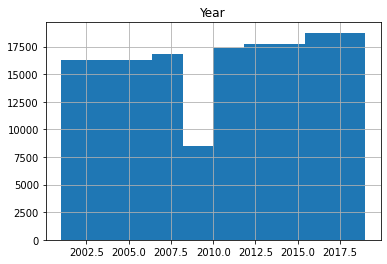

In [23]:
df.hist(column='Year')

### Finding the different categories of columns:

In [24]:
def categories(lst):
    for column in lst:
        print(f'printing for {column}')
        print(df[column].unique())

lst = ['Disease', 'County']
categories(lst)

printing for Disease
['Amebiasis' 'Anaplasmosis' 'Anthrax' 'Babesiosis' 'Botulism, Foodborne'
 'Botulism, Other' 'Botulism, Wound' 'Brucellosis' 'Campylobacteriosis'
 'Chikungunya Virus Infection' 'Cholera' 'Ciguatera Fish Poisoning'
 'Coccidioidomycosis'
 'Creutzfeldt-Jakob Disease and other Transmissible Spongiform Encephalopathies'
 'Cryptosporidiosis' 'Cyclosporiasis' 'Cysticercosis or Taeniasis'
 'Dengue Virus Infection' 'Domoic Acid Poisoning' 'Ehrlichiosis'
 'Flavivirus Infection of Undetermined Species' 'Giardiasis'
 'Hantavirus Infection' 'Hemolytic Uremic Syndrome'
 'Hepatitis E, acute infection' 'Legionellosis' 'Leprosy' 'Leptospirosis'
 'Listeriosis' 'Lyme Disease' 'Malaria' 'Paralytic Shellfish Poisoning'
 'Paratyphoid Fever' 'Plague, human' 'Psittacosis' 'Q Fever'
 'Rabies, human' 'Relapsing Fever' 'Salmonellosis'
 'Scombroid Fish Poisoning'
 'Shiga toxin-producing E. coli (STEC) with HUS'
 'Shiga toxin-producing E. coli (STEC) without HUS' 'Shigellosis'
 'Spotted Fever R

In [25]:
df[df['Cases'].isna()]

,Disease,County,Year,Sex,Cases,Population,Rate,Lower_95__CI,Upper_95__CI
249,Amebiasis,Calaveras,2008,Female,NaN,22864,SC,NaN,NaN
250,Amebiasis,Calaveras,2008,Male,NaN,22838,SC,NaN,NaN
657,Amebiasis,Glenn,2011,Female,NaN,14044,SC,NaN,NaN
658,Amebiasis,Glenn,2011,Male,NaN,14329,SC,NaN,NaN
669,Amebiasis,Glenn,2015,Female,NaN,14280,SC,NaN,NaN
...,...,...,...,...,...,...,...,...,...
164338,Zika Virus Infection,Sutter,2016,Male,NaN,48745,SC,NaN,NaN
164340,Zika Virus Infection,Sutter,2017,Female,NaN,49446,SC,NaN,NaN
164341,Zika Virus Infection,Sutter,2017,Male,NaN,48896,SC,NaN,NaN
164421,Zika Virus Infection,Yuba,2016,Female,NaN,37475,SC,NaN,NaN


In [26]:
df[['Year','Disease', 'Sex']].groupby('Sex').sum()

,Year
Sex,
Female,110185509
Male,110185509
Total,110185509


In [ ]:
#what disease had the highest rate among females in 2016? 2017? 
#What disease had the lowest rate among females in 2016?
#What disease had the highest rate in total? In what year did this occurs?

In [38]:
df['Rate']

0         0.938*
1         1.252*
2         1.092*
3         0.535*
4         0.694*
           ...  
164428         -
164429         -
164430         -
164431         -
164432         -
Name: Rate, Length: 164433, dtype: object

In [37]:
df.sort_values(by='Rate').head(30)

,Disease,County,Year,Sex,Cases,Population,Rate,Lower_95__CI,Upper_95__CI
82216,Leptospirosis,Mendocino,2006,Male,0.0,43690,-,0.0,8.443
102097,"Plague, human",San Joaquin,2016,Male,0.0,368167,-,0.0,1.002
102096,"Plague, human",San Joaquin,2016,Female,0.0,370594,-,0.0,0.995
102095,"Plague, human",San Joaquin,2015,Total,0.0,728423,-,0.0,0.506
102094,"Plague, human",San Joaquin,2015,Male,0.0,363079,-,0.0,1.016
102093,"Plague, human",San Joaquin,2015,Female,0.0,365393,-,0.0,1.010
102092,"Plague, human",San Joaquin,2014,Total,0.0,717649,-,0.0,0.514
102091,"Plague, human",San Joaquin,2014,Male,0.0,357884,-,0.0,1.031
102090,"Plague, human",San Joaquin,2014,Female,0.0,359962,-,0.0,1.025
102089,"Plague, human",San Joaquin,2013,Total,0.0,706919,-,0.0,0.522


In [32]:
df.applymap(np.isreal)

,Disease,County,Year,Sex,Cases,Population,Rate,Lower_95__CI,Upper_95__CI
0,False,False,True,False,True,True,False,True,True
1,False,False,True,False,True,True,False,True,True
2,False,False,True,False,True,True,False,True,True
3,False,False,True,False,True,True,False,True,True
4,False,False,True,False,True,True,False,True,True
...,...,...,...,...,...,...,...,...,...
164428,False,False,True,False,True,True,False,True,True
164429,False,False,True,False,True,True,False,True,True
164430,False,False,True,False,True,True,False,True,True
164431,False,False,True,False,True,True,False,True,True


## Research 

28 Devastating Infectious Diseases from livescience.com

In [16]:
import requests
from bs4 import BeautifulSoup

In [17]:
response = requests.get('https://www.livescience.com/13694-devastating-infectious-diseases-smallpox-plague.html')
soup = BeautifulSoup(response.content, 'html.parser')
name_of_diseases = soup.find_all('h2')

print('28 Devastating Infectious Diseases')
lst = [item.text for item in name_of_diseases]
print(lst)

28 Devastating Infectious Diseases
['The new coronavirus', 'Smallpox', 'Plague', 'Malaria', 'Influenza', 'Tuberculosis', 'HIV/AIDS', 'Cholera', 'Rabies', 'Pneumonia', 'Infectious diarrhea', 'Ebola', 'Variant Creutzfeldt-Jakob disease', 'Marburg', 'Middle East respiratory syndrome (MERS)', 'Dengue', 'Yellow fever', 'Hantaviruses', 'Anthrax', 'MRSA "superbug"', 'Pertussis', 'Tetanus', 'Meningitis', 'Syphilis', 'SARS', 'Leprosy', 'Measles', 'Zika']


#### All the diseases found in the dataframe

In [12]:
diseases_lst = df['Disease'].unique()
diseases_lst

array(['Amebiasis', 'Anaplasmosis', 'Anthrax', 'Babesiosis',
       'Botulism, Foodborne', 'Botulism, Other', 'Botulism, Wound',
       'Brucellosis', 'Campylobacteriosis', 'Chikungunya Virus Infection',
       'Cholera', 'Ciguatera Fish Poisoning', 'Coccidioidomycosis',
       'Creutzfeldt-Jakob Disease and other Transmissible Spongiform Encephalopathies',
       'Cryptosporidiosis', 'Cyclosporiasis',
       'Cysticercosis or Taeniasis', 'Dengue Virus Infection',
       'Domoic Acid Poisoning', 'Ehrlichiosis',
       'Flavivirus Infection of Undetermined Species', 'Giardiasis',
       'Hantavirus Infection', 'Hemolytic Uremic Syndrome',
       'Hepatitis E, acute infection', 'Legionellosis', 'Leprosy',
       'Leptospirosis', 'Listeriosis', 'Lyme Disease', 'Malaria',
       'Paralytic Shellfish Poisoning', 'Paratyphoid Fever',
       'Plague, human', 'Psittacosis', 'Q Fever', 'Rabies, human',
       'Relapsing Fever', 'Salmonellosis', 'Scombroid Fish Poisoning',
       'Shiga toxin-pr

#### Checking the diseases from the dataframe that are mentioned as part of the 28 Devastating Infectious Diseases from livescience.com

In [14]:
for diseases in lst:
    if diseases in diseases_lst:
        print(diseases)

Malaria
Cholera
Anthrax
Leprosy


### What are infectious Diseases?

Infectious Diseases are diseases caused by pathogenic microorganisms - such as parasites, viruses, or bacteria.

They can be spread, indirectly or directly (vector-borne), from animals to humans, and from person to another.

When the immune system of a host is fully functional, disease symptoms may not develop whenever an infectious organism attacks it. But, if the host immune system is compromised, or the infectious organism overwhelms the immune system, an infectious disease may take over the host's immune system. 

The discovery of antibiotics has helped slow down the spread of infectious diseases, but the misused and overused of them are creating antibiotic-resistant bacteria. It is critical to keep track of infectious diseases as they are a major public health problem.

[source](https://www.sciencedirect.com/topics/immunology-and-microbiology/infectious-diseases)

#### More links

[Modeling the coronavirus disease 2019 pandemic: A comprehensive guide of infectious disease and decision-analytic models](sciencedirect.com/science/article/pii/S089543562031204X)

[Information about infectious diseases](https://www.nfid.org/infectious-diseases/)

[The potential of wastewater-based epidemiology as surveillance and early warning of infectious disease outbreaks](https://www.sciencedirect.com/science/article/abs/pii/S2468584420300337)

[Common Infectious Diseases](https://www.sciencedirect.com/science/article/abs/pii/S0095454320300907)
[Data Mining for recognizing patterns in foodborne disease outbreaks](https://www.sciencedirect.com/science/article/abs/pii/S026087740900510X)

[What could a future of AI-augmented infectious disease surveillance look like?](https://towardsdatascience.com/what-could-a-future-of-ai-augmented-infectious-disease-surveillance-look-like-1950363ebb2c)

[How AI can help manage infectious diseases](https://www.kdnuggets.com/2020/04/ai-manage-infectious-diseases.html)

I will be working with the following dataset:

Potential Questions to ask:

1. Are foodborne disease outbreaks increasing or decreasing? 
2. What contaminant has been responsible for the most illnesses, hospitalizations, and deaths? 
3. What location for food preparation poses the greatest risk of foodborne illness?
4. What year saw the most foodborne disease outbreaks?
5. Which species had the most foodborne disease outbreaks every year from 1998 to 2015?

### Let's read the csv as a dataframe for exploratory analysis

In [3]:
df = pd.read_csv('../data/outbreaks.csv')

[link to kaggle outbreaks dataset](https://www.kaggle.com/cdc/foodborne-diseases)

In [4]:
df

,Year,Month,State,Location,Food,Ingredient,Species,Serotype/Genotype,Status,Illnesses,Hospitalizations,Fatalities
0,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,20,0.0,0.0
1,1998,January,California,NaN,Custard,NaN,NaN,NaN,NaN,112,0.0,0.0
2,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,35,0.0,0.0
3,1998,January,California,Restaurant,"Fish, Ahi",NaN,Scombroid toxin,NaN,Confirmed,4,0.0,0.0
4,1998,January,California,Private Home/Residence,"Lasagna, Unspecified; Eggs, Other",NaN,Salmonella enterica,Enteritidis,Confirmed,26,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19114,2015,December,Wisconsin,Restaurant,NaN,NaN,Norovirus genogroup II,GII_14,Confirmed,4,0.0,0.0
19115,2015,December,Wisconsin,Private Home/Residence,Salsa,NaN,Norovirus genogroup II,GII_2,Confirmed,16,0.0,0.0
19116,2015,December,Wisconsin,Nursing Home/Assisted Living Facility,NaN,NaN,Norovirus genogroup II,GII_17 Kawasaki (2014),Confirmed,43,3.0,0.0
19117,2015,December,Wisconsin,Fast Food Restaurant,NaN,NaN,Norovirus genogroup II,GII_2,Confirmed,5,0.0,0.0


#### Getting info about the dataframe. There's 19,119 entries in the dataframe

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19119 entries, 0 to 19118
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               19119 non-null  int64  
 1   Month              19119 non-null  object 
 2   State              19119 non-null  object 
 3   Location           16953 non-null  object 
 4   Food               10156 non-null  object 
 5   Ingredient         1876 non-null   object 
 6   Species            12500 non-null  object 
 7   Serotype/Genotype  3907 non-null   object 
 8   Status             12500 non-null  object 
 9   Illnesses          19119 non-null  int64  
 10  Hospitalizations   15494 non-null  float64
 11  Fatalities         15518 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 1.2+ MB


#### This is providing the number of missing values per column

The column illnesses has 0 missing values, whereas hospitalizations and fatalities have 3625 and 3601 missing values, respectively. There are 19,119 entries, so both hospitalizations and fatalities have about 18% of their data missing.

In [6]:
df.isna().sum()

Year                     0
Month                    0
State                    0
Location              2166
Food                  8963
Ingredient           17243
Species               6619
Serotype/Genotype    15212
Status                6619
Illnesses                0
Hospitalizations      3625
Fatalities            3601
dtype: int64

#### This method helps us to see the  range of years in the dataframe.

The years range from 1998 to 2015.

In [9]:
df['Year'].unique()

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015], dtype=int64)

#### And this is showing the number of unique values per column. As you can see, there's 201 different species responsible for foodborn disease outbreaks in the US from 1998 to 2015 

In [7]:
df.nunique()

Year                   18
Month                  12
State                  55
Location              161
Food                 3127
Ingredient            381
Species               201
Serotype/Genotype     239
Status                 22
Illnesses             302
Hospitalizations       61
Fatalities             12
dtype: int64

#### Grouping by location and calculating the total number of illness cases, hospitalizations, and fatalities per location
Sorting by illnesses in descending order to see the location of the highest number of people that fell ill 

In [11]:
location_df = df[['Location', 'Illnesses', 'Hospitalizations', 'Fatalities']].groupby('Location', as_index = False).sum().sort_values(by='Illnesses', ascending = False).head(20)
location_df

,Location,Illnesses,Hospitalizations,Fatalities
98,Restaurant,131970,4665.0,62.0
9,Catering Service,36044,412.0,4.0
65,Private Home/Residence,22564,2526.0,82.0
64,Prison/Jail,20608,173.0,4.0
155,School/College/University,19910,213.0,0.0
0,Banquet Facility,12272,83.0,1.0
160,Unknown,7648,389.0,5.0
55,Nursing Home/Assisted Living Facility,5625,293.0,44.0
105,Restaurant; Catering Service,5243,122.0,3.0
30,Fast Food Restaurant,4336,329.0,1.0


### Finding the top 6 locations where outbreaks occurred from 1998 to 2015

In [12]:
loc = location_df['Location'][:6]

print(f'The top 6 locations where foodborne disease outbreaks occured are:')
for item in loc:
    print(item)

The top 6 locations where foodborne disease outbreaks occured are:
Restaurant
Catering Service
Private Home/Residence
Prison/Jail
School/College/University
Banquet Facility


### Sorting the dataframe by the 'fatalities' column and returning it in descending order

This shows that in July of 2011 there was a foodborne disease outbreak that occurred in multiple states with the highest fatalities. This outbreak was from contamination of cantaloupe from listeria monocytogenes. The location is private home/residence

##### Questions: What other times has listeria monocytogenes been the main disease to cause a hugh number of fatalities? Has there been other times when this species has caused multistate outbreaks?

In [8]:
df.sort_values(by='Fatalities', ascending = False)

,Year,Month,State,Location,Food,Ingredient,Species,Serotype/Genotype,Status,Illnesses,Hospitalizations,Fatalities
15329,2011,July,Multistate,Private Home/Residence,Cantaloupe,Cantaloupe,Listeria monocytogenes,NaN,Confirmed,147,143.0,33.0
1062,1998,October,Multistate,NaN,"Hot Dog, Unspecified",NaN,Listeria monocytogenes,NaN,Confirmed,101,101.0,21.0
13108,2008,September,Multistate,NaN,Peanut Butter; Peanut Paste,NaN,Salmonella enterica,Typhimurium,Confirmed,714,166.0,9.0
6043,2002,July,Multistate,Restaurant,"Deli Meat, Sliced Turkey",NaN,Listeria monocytogenes,NaN,Confirmed,54,NaN,8.0
3251,2000,May,Multistate,Restaurant,"Deli Meat, Sliced Turkey",Turkey,Listeria monocytogenes,NaN,Confirmed,29,29.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
18844,2015,August,Washington DC,Office/Indoor Workplace,"Fish, Amberjack",NaN,Ciguatoxin,NaN,Suspected,6,NaN,NaN
18921,2015,October,Illinois,Farm/Dairy,NaN,NaN,Cryptosporidium parvum,IIaA17G2R2,Confirmed,103,NaN,NaN
18989,2015,November,Illinois,Restaurant,NaN,NaN,Norovirus,NaN,Suspected,9,NaN,NaN
19059,2015,December,Illinois,Catering Service,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN


### We can see that in February 2010 there was a Salomonella outbreak that ocurred in multiple states, which has the highest number of illnesses cases for all years. The food that was contaminated was a shell egg. This outbreak occured in many locations, including restaurants, private home, prison/jail.

In [23]:
df.sort_values(by='Illnesses', ascending = False)

,Year,Month,State,Location,Food,Ingredient,Species,Serotype/Genotype,Status,Illnesses,Hospitalizations,Fatalities
14169,2010,February,Multistate,Restaurant; Restaurant; Private Home/Residence...,"Shell Egg, Other",Egg,Salmonella enterica,Enteritidis,Confirmed,1939,NaN,NaN
10396,2006,May,California,Prison/Jail,"Other Milk, Pasteurized",NaN,Campylobacter jejuni,NaN,Confirmed,1644,7.0,0.0
12678,2008,April,Multistate,NaN,"Peppers, Jalapeno; Tomato, Unspecified; Pepper...",NaN,Salmonella enterica,Saintpaul,Confirmed,1500,308.0,2.0
10282,2006,April,Colorado,NaN,NaN,NaN,Norovirus genogroup I,NaN,Confirmed,1200,1.0,0.0
6701,2003,January,Texas,Unknown,NaN,NaN,Shigella sonnei,NaN,Confirmed,964,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5655,2002,April,Illinois,Restaurant,NaN,NaN,NaN,NaN,NaN,2,0.0,0.0
5656,2002,April,Illinois,Restaurant,NaN,NaN,Norovirus genogroup I,GI_1,Confirmed,2,0.0,0.0
1965,1999,July,Alabama,Restaurant,NaN,NaN,NaN,NaN,NaN,2,0.0,0.0
9693,2005,August,Illinois,Restaurant,NaN,NaN,NaN,NaN,NaN,2,0.0,0.0


### 2004 experienced the highest number of reported illnesses at 29034 cases, 779 hospitalizations, and 22 fatalities.

In 2006, there was 28,656 cases of illnesses, a smaller number of cases compared to 2004, but there was a higher number of hospitalizations (1170 campared to 779 hospitalizations in 2004).

##### Question: What diseases led the high cases of illnesses in 2004 and 2006? What is the breakdown of the main diseases in these two years?

In [29]:
df_year = df.groupby('Year', as_index = False).sum().sort_values('Illnesses', ascending = False)
df_year

,Year,Illnesses,Hospitalizations,Fatalities
6,2004,29034,779.0,22.0
8,2006,28656,1170.0,10.0
0,1998,27156,886.0,33.0
2,2000,26033,728.0,22.0
3,2001,25192,665.0,11.0
4,2002,24939,734.0,14.0
1,1999,24899,598.0,10.0
10,2008,23089,1250.0,22.0
5,2003,23079,687.0,24.0
9,2007,20970,877.0,18.0


In [ ]:
#graph illnesses by year

In [48]:
x = df_year['Year']
x

6     2004
8     2006
0     1998
2     2000
3     2001
4     2002
1     1999
10    2008
5     2003
9     2007
7     2005
12    2010
17    2015
14    2012
13    2011
11    2009
15    2013
16    2014
Name: Year, dtype: int64

### The following graph depicts the total number of cases per year from 1998 to 2015. Overall, there was been a decrease in the number of illnesses cases caused by outbreaks in the US.

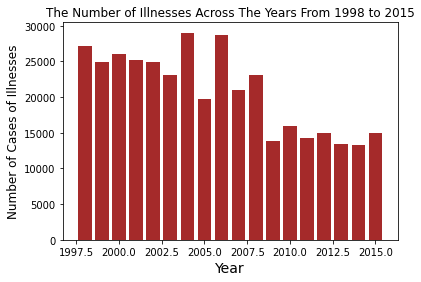

In [61]:
x = df_year['Year']
y = df_year['Illnesses']

fig, ax = plt.subplots()
ax.bar(x,y, color = 'brown')
plt.title('The Number of Illnesses Across The Years From 1998 to 2015', fontsize = 12)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Cases of Illnesses', fontsize=12)
# ax.xaxis.set_major_locator(plt.MaxNLocator(7))
plt.show()

### Grouping illnesses, hospitalizations, and fatalities by State, and summing the total number of cases for each column.

From this, we can see that California had 39,992 cases of foodborn disease illnesses, the highest number of illnesses from 1998 to 2015, followed by Illinois with 24,700

In [32]:
df[['State', 'Illnesses', 'Hospitalizations', 'Fatalities']].groupby(by = 'State').sum().sort_values('Illnesses', ascending = False)

,Illnesses,Hospitalizations,Fatalities
State,,,
California,39992,1062.0,26.0
Illinois,24700,713.0,5.0
Multistate,24573,4011.0,150.0
Florida,23050,684.0,23.0
Ohio,20451,659.0,8.0
New York,17407,591.0,12.0
Michigan,14471,357.0,5.0
Texas,14187,337.0,14.0
Minnesota,13533,373.0,3.0
